<h1 style="text-align: center;">
  Engineering Economics Python Project - Dr. Maryam Rezapour - 1402-3
</h1>

=======================================================================================================================


<h5 style="text-align: center;">  
محمد حسین نریمانی (401104519)
-
امیر مهدی بیگدلی (401103955)
-
عرفان بیدمشکی (401103933)
-
دانیال صولت نیا (400103498)
-
علیرضا سعیدی نجات (401104179)
</h5>

=======================================================================================================================

## Library Preparations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mplt
import sklearn.linear_model as lm
import sklearn.metrics as sm
import EE_PROJECT_BEET_FUNCTIONS as EPBF

## Data Retrieval 

As the first step of our project, our data is imported from "data.xslx" and placed into a dataframe.

In [2]:
root = r'C:/Users/m-saeidinejat/Desktop/N/@ UN - Present/Engineering Economics/1 - Python Project/data'
DATA = pd.read_csv(root + '.csv')
DATA

,Years,Salary,material 1,material 2,demand,price
0,1990,39343.0,200.000000,89.600000,103,1200.0
1,1991,46205.0,212.000000,92.662500,104,1375.0
2,1992,37731.0,224.720000,95.807250,101,1451.0
3,1993,43525.0,238.203200,99.034819,99,1593.0
4,1994,39891.0,252.495392,102.345626,95,1718.5
5,1995,56642.0,267.645115,105.739927,96,1844.0
6,1996,60150.0,283.703823,109.217795,95,1969.5
7,1997,54445.0,300.726052,112.779099,92,2095.0
8,1998,64445.0,318.769615,116.423489,92,2220.5
9,1999,57189.0,337.895792,120.150370,87,2346.0


### Null Managing

To manage our nulls, it was decided that they would be filled with the Mean of the next and previous cells' data.

In [3]:
column_name = 'Salary'
DATA[column_name] = DATA[column_name].fillna((DATA[column_name].shift() + DATA[column_name].shift(-1)) / 2)
DATA

,Years,Salary,material 1,material 2,demand,price
0,1990,39343.0,200.000000,89.600000,103,1200.0
1,1991,46205.0,212.000000,92.662500,104,1375.0
2,1992,37731.0,224.720000,95.807250,101,1451.0
3,1993,43525.0,238.203200,99.034819,99,1593.0
4,1994,39891.0,252.495392,102.345626,95,1718.5
5,1995,56642.0,267.645115,105.739927,96,1844.0
6,1996,60150.0,283.703823,109.217795,95,1969.5
7,1997,54445.0,300.726052,112.779099,92,2095.0
8,1998,64445.0,318.769615,116.423489,92,2220.5
9,1999,57189.0,337.895792,120.150370,87,2346.0


# Data Prediction

## Worker Salaries

A simple linear regression method will be used to show the Salary of the workers all the way to the year 2050, by using the previous data of the Worker Salaries from the year 1990 to 2022.

In [5]:
years = np.arange(1990, 2051).reshape(-1, 1)
future_years = np.arange(2023, 2051).reshape(-1, 1)

def RegressionModel(INPUT : str):
    X = DATA['Years']
    X = X.values.reshape(-1, 1)
    Y = DATA[INPUT]

    model = lm.LinearRegression()
    model.fit(X,Y)

    future_predictions = model.predict(future_years)
    future_predictions = [round(num,2) for num in future_predictions]

    y = list(Y)
    f = list(future_predictions)
    PREDICTED_LIST = y + f

    return pd.DataFrame({'Year': years.flatten(), 'Predicted_Data': PREDICTED_LIST}), f

future_df , f = RegressionModel('Salary')
future_df

,Year,Predicted_Data
0,1990,39343.00
1,1991,46205.00
2,1992,37731.00
3,1993,43525.00
4,1994,39891.00
...,...,...
56,2046,182558.65
57,2047,185213.70
58,2048,187868.76
59,2049,190523.81


### Worker Salaries Visualization & Regression Line



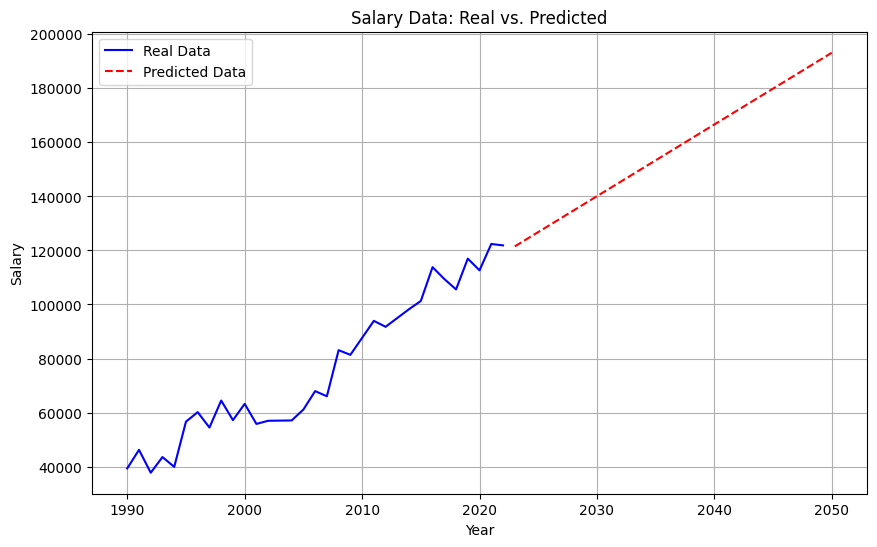

In [6]:
mplt.figure(figsize=(10, 6))
mplt.plot(DATA['Years'], DATA['Salary'], label='Real Data', color='blue')
mplt.plot(future_years, f, label='Predicted Data', color='red', linestyle='--')
mplt.xlabel('Year')
mplt.ylabel('Salary')
mplt.title('Salary Data: Real vs. Predicted')
mplt.legend()
mplt.grid(True)
mplt.show()

Accurancy:

In [7]:
mae = sm.mean_absolute_error(future_years,f)
print('Mean Absolute Error (MAE):', mae)

Mean Absolute Error (MAE): 155299.15107142858


## Price of Material 1

This material is imported and has a 1% inflation rate. The rate of it's increase in price is accumalated with a 5% interest rate. The prices are estimated till the year 2050.

In [8]:
Y_1 = DATA['material 1']
Current_Price = list(DATA['material 1'])[-1]

Inflation_Rate = 0.01
Interest_Rate = 0.05
Rate = 1 + Inflation_Rate + Interest_Rate

future_predictions_1 = []

for year in future_years:
    Current_Price *= Rate
    future_predictions_1.append(Current_Price)

y_1 = list(Y_1)
f_1 = list(future_predictions_1)
Material_1 = y_1 + f_1

future_df_1 = pd.DataFrame({'Year': years.flatten(), 'Predicted_Material_1': Material_1})

future_df_1


,Year,Predicted_Material_1
0,1990,200.000000
1,1991,212.000000
2,1992,224.720000
3,1993,238.203200
4,1994,252.495392
...,...,...
56,2046,5225.868176
57,2047,5539.420267
58,2048,5871.785483
59,2049,6224.092612


## Price of Material 2

The __value__ of Material 2 has a decreasing linear form after 1990. A 5% interest rate effects the price. The values of Material 2's prices will be multiplied by a factor and then a regression model will be used.

### Material 2's Price Visualization & Regression Line

Accurancy:

## Demand 

The demand of each product is a function as shown:
#### e ^ (-n/50) ; n = year - 1990

A regression model with the new data will be used to predict demand to the year 2050.

### Demand Visualization & Regression Line



## Product Price

A simple linear regression method will be used to show the price of the final product all the way to the year 2050, by using the previous data of the Product's Prices from the year 1990 to 2022.



In [11]:
future_df_3 , f_3 = RegressionModel('price')
future_df_3

,Year,Predicted_Data
0,1990,1200.0
1,1991,1375.0
2,1992,1451.0
3,1993,1593.0
4,1994,1718.5
...,...,...
56,2046,8244.5
57,2047,8370.0
58,2048,8495.5
59,2049,8621.0


### Product Price Visualization & Regression Line



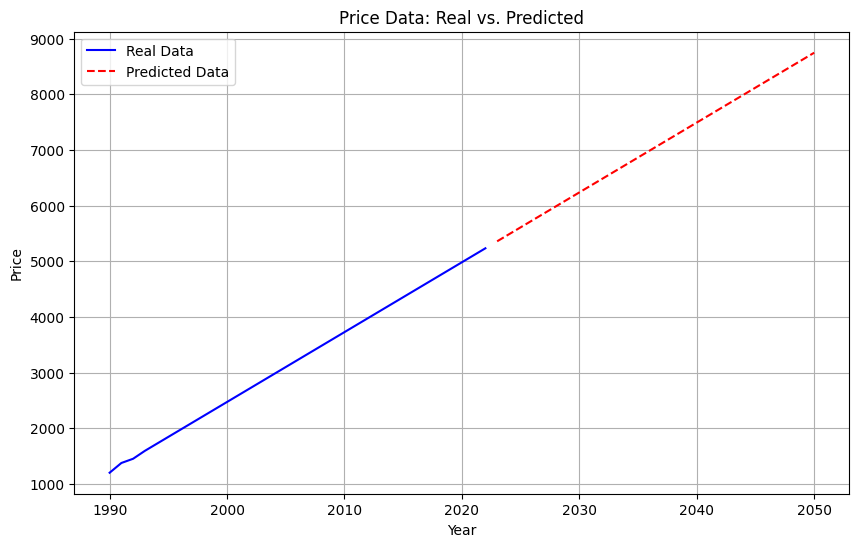

In [12]:
mplt.figure(figsize=(10, 6))
mplt.plot(DATA['Years'], DATA['price'], label='Real Data', color='blue')
mplt.plot(future_years, f_1, label='Predicted Data', color='red', linestyle='--')
mplt.xlabel('Year')
mplt.ylabel('Price')
mplt.title('Price Data: Real vs. Predicted')
mplt.legend()
mplt.grid(True)
mplt.show()

Accurancy:

In [13]:
mae_3 = sm.mean_absolute_error(future_years,f_3)
print('Mean Absolute Error (MAE):', mae_3)

Mean Absolute Error (MAE): 5015.75


## Requirements :

### 1)